# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [28]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

The correlation coefficient between x and y is 0.99


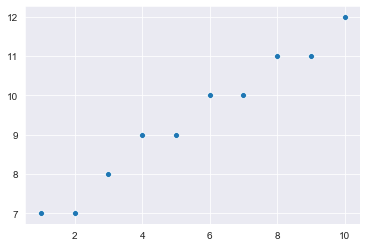

In [38]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)

# plot the dependent and independent variables
sns.scatterplot(X,Y);
# From the plot it seems like we have a strong positive correlation between between x and y
print(f"The correlation coefficient between x and y is {round(np.corrcoef(X,Y)[0][1],2)}")
# using np's correlation coefficient we confirm that there is a strong positive correlation between x and y

In [39]:
# Next, we have to create the model
import statsmodels.api as sm

# Add the constant term to the data
x = sm.add_constant(X) 

# Create the model
model = sm.OLS(Y, x).fit()

# Look at the summary statistics 
model.summary()

/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     273.0
Date:                Tue, 13 Oct 2020   Prob (F-statistic):           1.82e-07
Time:                        16:59:54   Log-Likelihood:                -1.2481
No. Observations:                  10   AIC:                             6.496
Df Residuals:                       8   BIC:                             7.101
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3333      0.209     30.249      0.000       5.851       6.816
x1             0.5576      0.034     16.524      0.000       0.480       0.635
==============================================================================
Omnibus:                        0.532   Durbin-Watson:                   2.957
Prob(Omnibus):                  0.766   Jarque-Bera (JB):                0.512
Skew:                          -0.105   Prob(JB):                        0.774
Kurtosis:                       1.912   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpreting the data

We ran a linear regression analysis using ordinary least squares analysis with X as the independent varialble and Y as the dependent variable. According to our model as X increased by 1, Y was predicted to increase by close to 0.56. The coefficient B naught is equal to 6.333. Therefore our statistical model is:

y_hat = 0.56*(X) + 6.33


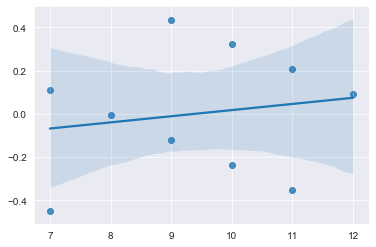

In [40]:
# Next we need to validate our results by checking that our residuals are normal. 
pred_val = model.fittedvalues.copy()
true_val = Y
residual = true_val - pred_val

# fig, ax = plt.subplots(figsize=(8, 6))
# ax.scatter(true_val,residual)
# ax.set_title('Residual Scatterplot')
# ax.set_xlabel('Observed')
# ax.set_ylabel('Residuals')
# ax.axhline(y=0, color ='r')
# plt.show()
sns.regplot(true_val, residual);

It seems like our residuals are not correllated with the dependent value, indicating that we have homoscedacity.

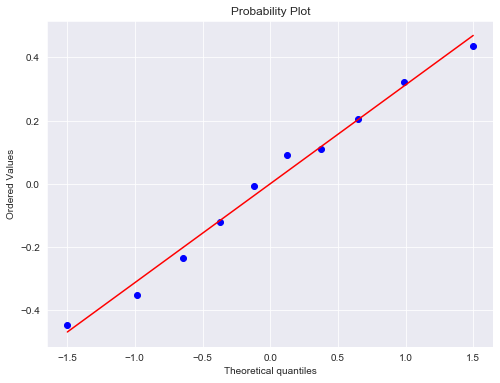

In [41]:
import scipy as sp
fig, ax = plt.subplots(figsize=(8,6))
sp.stats.probplot(residual, plot=ax, fit=True);

(array([1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 2., 0., 1., 0., 0.,
        1., 0., 1.]),
 array([-0.44848485, -0.40424242, -0.36      , -0.31575758, -0.27151515,
        -0.22727273, -0.1830303 , -0.13878788, -0.09454545, -0.05030303,
        -0.00606061,  0.03818182,  0.08242424,  0.12666667,  0.17090909,
         0.21515152,  0.25939394,  0.30363636,  0.34787879,  0.39212121,
         0.43636364]),
 <a list of 20 Patch objects>)

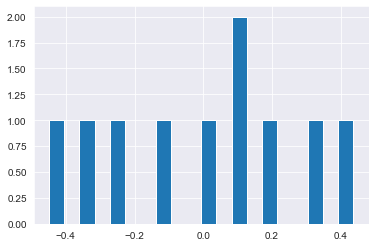

In [53]:
plt.hist(residual, bins=20)

The QQ plot appears normal, but with such a small sample size it is reasonable that it would not be.

In [42]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

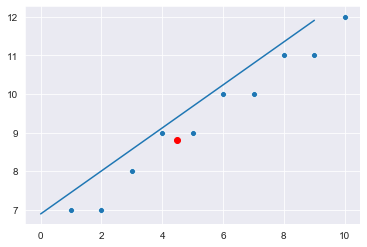

In [61]:
ax = sns.scatterplot(X,Y)
prediction = 6.33 + 4.5*0.55
plt.scatter(4.5, prediction, color = 'r')
plt.plot(pred_val);

In [60]:
x, X

(array([[ 1.,  1.],
        [ 1.,  2.],
        [ 1.,  3.],
        [ 1.,  4.],
        [ 1.,  5.],
        [ 1.,  6.],
        [ 1.,  7.],
        [ 1.,  8.],
        [ 1.,  9.],
        [ 1., 10.]]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]))

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 